# 🏨 Preprocessing Dataset Hotel Booking

## 📌 Deskripsi Dataset
Dataset yang digunakan dalam proyek ini adalah **Hotel Booking Dataset** yang tersedia di Kaggle.  
Dataset ini berisi informasi tentang pemesanan hotel, termasuk detail seperti lama menginap, jumlah tamu, negara asal, serta informasi terkait pembatalan pemesanan.  

📂 **Sumber Dataset:**  
🔗 [Hotel Booking Dataset - Kaggle](https://www.kaggle.com/datasets/abdul0haadi/hotel-booking-dataset)  

## 🎯 Tujuan Proses Preprocessing
Preprocessing adalah langkah awal yang sangat penting dalam analisis data. Dataset ini memiliki beberapa tantangan yang perlu diatasi sebelum dapat digunakan untuk visualisasi atau analisis lebih lanjut menggunakan D3.js. Tujuan utama dari preprocessing ini meliputi:  

✅ **Menghapus Data yang Tidak Lengkap:**  
Dataset ini memiliki beberapa kolom dengan nilai yang hilang (missing values), seperti kolom `agent`, `company`, dan `country`. Kita akan menangani nilai-nilai yang hilang ini agar tidak mengganggu analisis data.  

✅ **Menghilangkan Duplikasi Data:**  
Dataset ini memiliki lebih dari **30.000 duplikasi**, yang dapat menyebabkan analisis menjadi bias. Oleh karena itu, data duplikat akan dihapus untuk memastikan hasil analisis lebih akurat.  

✅ **Menangani Data Tidak Valid:**  
Beberapa baris data mengandung jumlah tamu yang nol (`adults + children + babies = 0`), yang tidak masuk akal dalam konteks pemesanan hotel. Data semacam ini akan dibersihkan untuk memastikan kualitas dataset.  

✅ **Normalisasi Data:**  
Variabel numerik seperti `lead_time` dan `stays_in_week_nights` memiliki skala yang berbeda-beda. Oleh karena itu, kita akan melakukan **normalisasi menggunakan Min-Max Scaling** agar semua fitur berada dalam rentang yang seragam dan lebih mudah dianalisis.  

✅ **Deteksi dan Penanganan Outlier:**  
Outlier dapat mengganggu analisis dan menyebabkan model prediktif menjadi kurang akurat. Oleh karena itu, kita akan melakukan deteksi outlier menggunakan **Boxplot** dan menangani nilai yang ekstrem dengan metode **capping (batas atas dan bawah IQR)**.  

## 📊 Output Akhir
Setelah preprocessing selesai, kita akan menyimpan dataset yang sudah dibersihkan dalam file CSV baru:  

📁 **Output File:** `hotel_bookings_cleaned.csv`  

Dataset ini nantinya akan siap digunakan untuk **visualisasi data dengan D3.js**, memungkinkan kita untuk membuat grafik interaktif yang menarik dan memberikan wawasan lebih mendalam mengenai pola pemesanan hotel. 🚀  


------------------------------------------------------------
📥 1. Import Library
------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

------------------------------------------------------------
📂 2. Load Dataset
------------------------------------------------------------

In [ ]:
# Path file yang diunggah
hotel_file_path = "./data/hotel_bookings 2.csv"

df_hotel = pd.read_csv(hotel_file_path)

# Menampilkan 5 baris pertama dari masing-masing dataset
print("\n=== Hotel Dataset ===")
df_hotel.head()


=== Hotel Dataset ===


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


------------------------------------------------------------
📊 3. Memeriksa Dimensi Dataset
------------------------------------------------------------

In [2]:
print("\n=== Dataset Shape ===")
df_hotel.shape



=== Dataset Shape ===


(119390, 32)

------------------------------------------------------------
🔍 4. Cek Missing Values
-----------------------------------------------------------

In [4]:
from IPython.display import display

# Buat DataFrame dari jumlah missing values
missing_values = df_hotel.isnull().sum().reset_index()
missing_values.columns = ["Feature", "Missing Values"]

# Tampilkan dengan display()
print("\n=== Dataset Null Values ===")
display(missing_values)


=== Dataset Null Values ===


,Feature,Missing Values
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_week_number,0
6,arrival_date_day_of_month,0
7,stays_in_weekend_nights,0
8,stays_in_week_nights,0
9,adults,0


------------------------------------------------------------
📈 5. Statistik Deskriptif
-----------------------------------------------------------

In [5]:
print("\n=== Dataset Describe ===")
df_hotel.describe()  # Menampilkan statistik deskriptif dari dataset


=== Dataset Describe ===


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


------------------------------------------------------------
❗ 6. Mengecek Duplikasi Data
------------------------------------------------------------

In [9]:
# Mengecek jumlah duplikat
print("\n=== Jumlah Data Duplikat ===")
print(df_hotel.duplicated().sum())  # Menampilkan jumlah baris duplikat



=== Jumlah Data Duplikat ===
32013


------------------------------------------------------------
🛠️ 7. Mengatasi Missing Values
------------------------------------------------------------

In [6]:

# 1. Mengisi kolom numerik dengan nilai median (children)
df_hotel["children"].fillna(df_hotel["children"].median(), inplace=True)

# 2. Mengisi kolom kategorikal dengan nilai modus (country)
df_hotel["country"].fillna(df_hotel["country"].mode()[0], inplace=True)

# 3. Mengisi kolom agent dan company dengan 0 (karena NaN berarti tidak ada agen/perusahaan)
df_hotel["agent"].fillna(0, inplace=True)
df_hotel["company"].fillna(0, inplace=True)

# Cek jumlah missing values setelah diisi
print("\n=== Setelah Mengatasi Missing Values ===")
print(df_hotel.isnull().sum())


=== Setelah Mengatasi Missing Values ===
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type         

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28308\3125461344.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hotel["children"].fillna(df_hotel["children"].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28308\3125461344.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

------------------------------------------------------------
✂️ 8. Menghapus Data Tidak Valid
-----------------------------------------------------------

In [7]:
df_hotel['children'] = df_hotel['children'].astype(int)
df_hotel['agent'] = df_hotel['agent'].astype(int)
df_hotel['company'] = df_hotel['company'].astype(int)

In [8]:
df_hotel['reservation_status_date'] = pd.to_datetime(df_hotel['reservation_status_date'], dayfirst=True, errors='coerce')

In [10]:
# 4. Menghapus duplikasi jika ada
df_hotel.drop_duplicates(inplace=True)

In [11]:
# 5. Menghapus data yang tidak valid (misal, jumlah tamu 0)
df_hotel = df_hotel[(df_hotel['adults'] + df_hotel['children'] + df_hotel['babies']) > 0]

------------------------------------------------------------
📏 9. Normalisasi Data
------------------------------------------------------------

In [ ]:
"
from sklearn.preprocessing import MinMaxScaler
# Inisialisasi scaler untuk masing-masing dataset
scaler = MinMaxScaler()

# Daftar kolom numerik yang akan dinormalisasi
num_cols = df_hotel.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Normalisasi dataset train (fit dan transform di train)
df_hotel[num_cols] = scaler.fit_transform(df_hotel[num_cols])"

------------------------------------------------------------
✨ 11. Menangani Outlier
------------------------------------------------------------

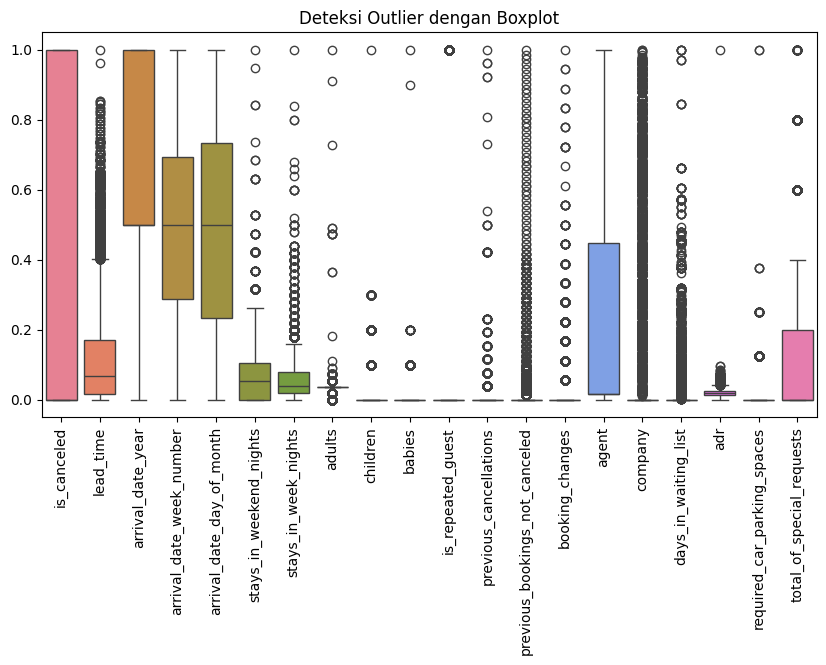

In [16]:
# Visualisasi boxplot untuk semua kolom numerik
plt.figure(figsize=(10,5))
sns.boxplot(data=df_hotel)
plt.xticks(rotation=90)  # Rotasi label agar lebih mudah dibaca
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()

In [17]:
# Daftar kolom numerik yang akan dicek outliernya
outlier_cols = [
    "lead_time", "stays_in_weekend_nights", "stays_in_week_nights", "adults",
    "children", "babies", "previous_cancellations", "previous_bookings_not_canceled",
    "booking_changes", "agent", "company", "days_in_waiting_list", "adr",
    "required_car_parking_spaces", "total_of_special_requests"
]

# Fungsi untuk menghitung jumlah outlier menggunakan IQR
def count_outliers_iqr(df, cols):
    outlier_counts = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        min_IQR = Q1 - 1.5 * IQR
        max_IQR = Q3 + 1.5 * IQR

        # Hitung jumlah outlier
        outliers = df[(df[col] < min_IQR) | (df[col] > max_IQR)]
        outlier_counts[col] = len(outliers)

    return outlier_counts

# Hitung jumlah outlier pada dataset
outlier_counts = count_outliers_iqr(df_hotel, outlier_cols)
print("\n=== Jumlah Outlier per Kolom ===")
print(outlier_counts)


=== Jumlah Outlier per Kolom ===
{'lead_time': 2394, 'stays_in_weekend_nights': 213, 'stays_in_week_nights': 1514, 'adults': 22721, 'children': 8364, 'babies': 914, 'previous_cancellations': 1681, 'previous_bookings_not_canceled': 3538, 'booking_changes': 15804, 'agent': 0, 'company': 5233, 'days_in_waiting_list': 855, 'adr': 2506, 'required_car_parking_spaces': 7306, 'total_of_special_requests': 2669}


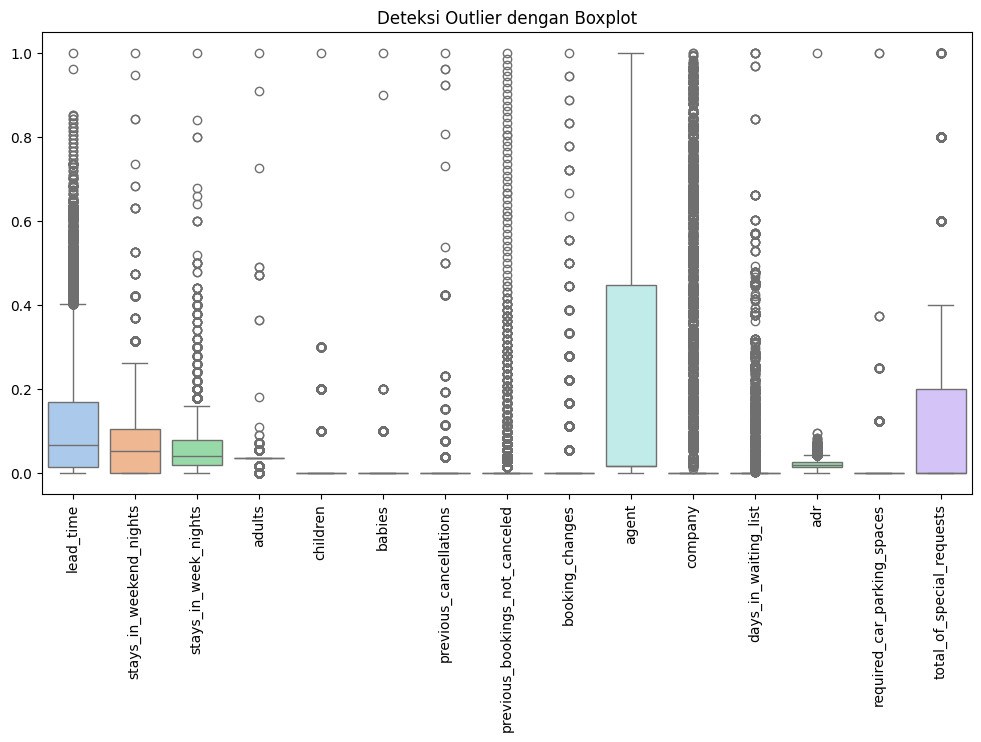

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_hotel[outlier_cols], palette="pastel")
plt.xticks(rotation=90)  # Rotasi label agar mudah dibaca
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()


In [19]:
# Fungsi untuk menangani outlier dengan metode capping (IQR)
def cap_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Ganti nilai outlier dengan batas bawah dan atas
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

# Menangani outlier pada kolom numerik
df_hotel = cap_outliers(df_hotel, outlier_cols)


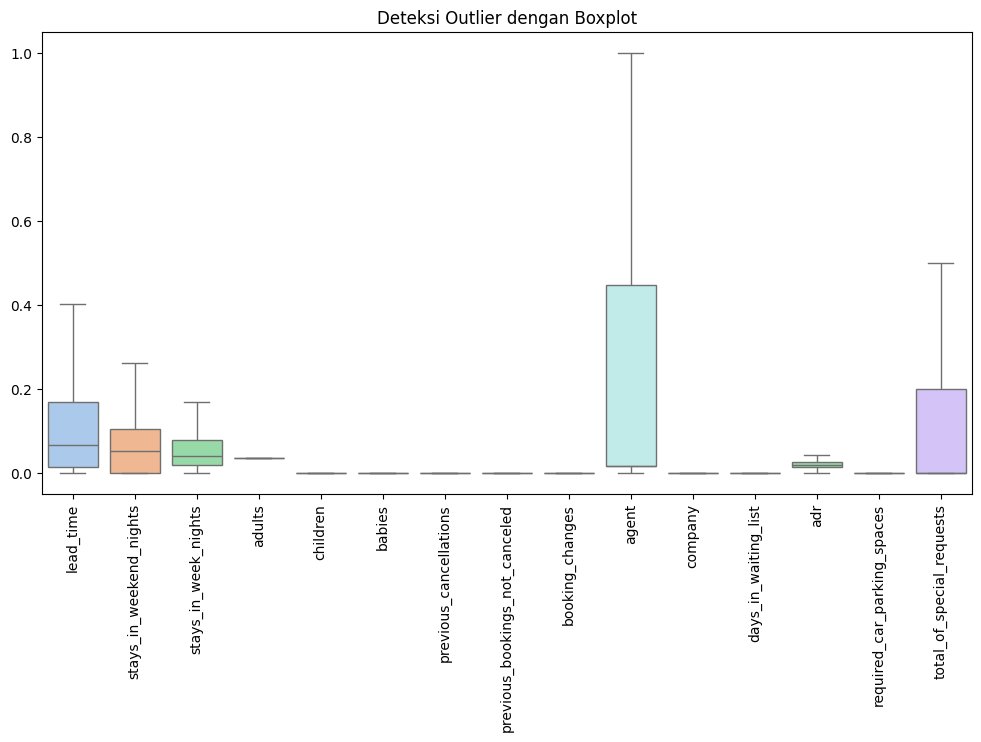

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_hotel[outlier_cols], palette="pastel")
plt.xticks(rotation=90)  # Rotasi label agar mudah dibaca
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()


------------------------------------------------------------
💾 12. Menyimpan Dataset yang Sudah Dibersihkan
------------------------------------------------------------

In [21]:
# Simpan dataset yang sudah dibersihkan
df_hotel.to_csv("./data/dataClean/hotel_bookings_cleaned.csv", index=False)

print("Dataset telah dibersihkan dan disimpan sebagai 'hotel_bookings_cleaned.csv'")

Dataset telah dibersihkan dan disimpan sebagai 'hotel_bookings_cleaned.csv'


------------------------------------------------------------
🎯 Kesimpulan
------------------------------------------------------------
✔️ Menghapus missing values  
✔️ Menghapus duplikasi & data tidak valid  
✔️ Normalisasi dengan Min-Max Scaling  
✔️ Deteksi & penanganan outlier  

💡 Dataset siap digunakan untuk analisis & visualisasi dengan D3.js! 🚀